<hr style="height:5px;border-width:0;color:orange;background-color:orange">
    <center> <span style="font-size: 38px;"> Computer Vision Classification </span> </center>

+ Author: **Alejandro Sánchez Silvestre**
+ Date: **February 2024**
+ Module: **Deep Learning**

<hr style="height:5px;border-width:0;color:orange;background-color:orange">


# Intro

**Datos:**

El problema a resolver consiste en una clasificación multiclase de imágenes (10 clases). Las imágenes tienen una resolución de 32x32 pixeles a color. Es decir no son imágenes de mucha resolución ni muy nítidas.

Obtenemos los datos desde el dataset CIFAR10 de Keras (https://keras.io/api/datasets/cifar10/). En el dataset tenemos unas 60.000 imagenes a RGB (50k train y 10k test) de 32x32 pixeles.

Asumimos que los datos estan limpios.


Las imagenes las tendremos que clasificar en 10 clases etiquetadas:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

**OBJETIVO**

Genenerar un modelo de Deep Learning capaz de clasificar correctamente las imagenes segun la clase.
Para la resolución de este problema usaremos una red neuronal con capas convolucionales (CNN) ya que trabajan mejor con imagenes que las capas densas.

Las métricas que utilizaremos para este problema será la **accuracy** ya que nos interesa capturar el máximo de true positives ya que los false positives y false negatives no penalizan. (en este caso utilizaríamos otras como recall o precision)





**ROAD MAP Y OUTLINE**:
- **Intro**
1. **Librerias**
2. **Preparacion de los datos**
3. **Arquitectura del modelo**
4. **Modelización y entrenamiento**
5. **Evaluacion de resultados**
6. **Conclusion**






<hr style="height:5px;border-width:0;color:orange;background-color:orange">

<a id='seccion1'></a>
# **1. Librerias**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

In [1]:
# Para empezar carguemos esas librerias que nos hacen falta
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime


from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")


<a id='seccion2'></a>
# **2. Preparacion de los datos**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

Cargamos los datos de CIFAR10 de los datasets directamente de las librerias de Keras. Estos ya estan dispuestos en train and test

La red neuronal requiere que los inputs sean números reales, y lo haremos forzando la division de los valores de dentro de las matrices. Estas son imagenes de 32x32 pixeles, siendo el valor de cada uno del 0 al 255 por cada color del RGB quedando asi un numero real del 0 al 1, esto ya si lo puede tragar la red neuronal.

Cada elemento del conjunto de etiquetas y_train e y_test es una matriz unidimensional que contiene la etiqueta correspondiente a cada imagen en x_train e x_test, respectivamente. Sin embargo, muchos modelos de aprendizaje automático esperan que las etiquetas sean un vector unidimensional en lugar de una matriz. Por lo tanto, se utiliza la función flatten() para convertir estas matrices unidimensionales en vectores unidimensionales, asegurando que las etiquetas sean compatibles con los modelos que se van a entrenar. Esto facilita el procesamiento y la compatibilidad con diferentes arquitecturas de modelos.

In [2]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Comprobamos que correctamente se han descargado bien los sets, esperando un array de 1 dimension para y_test
# y en el caso de x_test son un array de matrices de 3 dimensiones (corresponden a la informacion de cada imagen)
y_test


array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [4]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [5]:
# Acorde con la informacion en la web de keras, los label son los siguientes y corresponderian a una serie de
# numeros del 0 al 9 (los componentes de nuestro y_train e y_test)

cifar10_labels = [
'airplane', # id 0
'automobile',# id 1
'bird',#...
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck', #id 9
]



Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


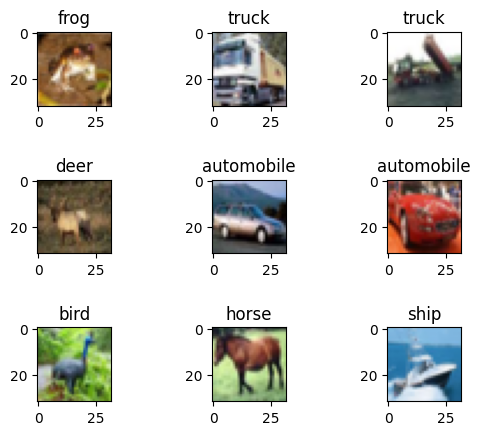

In [6]:
# Pintemos una muestra de las las imagenes del dataset

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
    plt.title(cifar10_labels[y_train[i]])

plt.subplots_adjust(hspace = 1)
plt.show()

In [7]:
# Como vamos a querer ir haciendo validación a la vez que entrenamos, extraemos 10.000 imagenes  para la validacion
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


Validamos que hemos extraido correctamente los sets de entrenamiento, validacion y test. Asi como su formato (deberiamos recibir imagenes de 32x32 a 3 canales (RGB)). Esto es imporante ya que las redes convolucionales esperan la entrada de 4 parametros.


In [8]:
# Validamos el resultado
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

# Correcto

Train: X=(40000, 32, 32, 3), y=(40000,)
Test: X=(10000, 32, 32, 3), y=(10000,)
Validation: X=(10000, 32, 32, 3), y=(10000,)



<a id='seccion3'></a>
# **3. Arquitectura neuronal del modelo**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

<div style="text-align:center"><img src="resumen_arquitectura.JPG" /></div>


## **Parametros a ajustar del modelo:**
- #### **Capas:**
    - Nº Neuronas: cuantas mas neuronas mas compleja será nuestra red neuronal pero más tiempo de cómputo requerirá
    - Nº Capas: determina la profundidad y la capacidad de aprendizaje de la red.
- #### **Tipo de capa**
    - Densa: cada neurona está conectada a todas las neuronas de la capa anterior
    - Convolucional: utiliza filtros para extraer características espaciales de las imágenes, con parámetros como el tamaño del kernel.
- #### **Funcion activadora por capa:**
    - ReLu : activación rectificada linealmente, utilizada en capas ocultas
    - Linerar: función identidad, utilizada en capas de salida para problemas de regresión, en este acaso no
    - Softmax: tilizada en la capa de salida para problemas de clasificación multiclase, normaliza las salidas para representar probabilidades. En este caso usaremos 10 neuronas ya que tenemos 10 clases a clasificar
- #### **Batchsize:** determina el número de muestras que se utilizan en cada iteración durante el entrenamiento.
- #### **Epochs:** número de veces que el algoritmo de entrenamiento recorre el conjunto de datos completo.
- #### **Optimizador:** algoritmo utilizado para minimizar la función de pérdida durante el entrenamiento.
    - Adam, SGD, otros. Adam es popular por su adaptabilidad del learning rate y la SGD es el método básico de descenso de gradiente estocástico.
Learning rate y decay: controlan el tamaño del paso durante la optimización.
    - Learning rate y decay: controlan el tamaño del paso durante la optimización
- #### **Funcion error:** como es un problema de clasificación usaremos la métrica Cross-Entropy Loss
- #### **Prevencion Overfitting**:
    - Dropout: "apagamos" neuronas durante el entrenamiento para evitar el sobreajuste.
    - Normalización: como Batch Normalization, para estandarizar la entrada de cada capa y estabilizar el proceso de entrenamiento.
    - Regularización: la usaremos para penalizar los coeficientes grandes y evitar el sobreajuste (L2).
    - Data augmentation: usaremos esta técnica para aumentar el tamaño del conjunto de datos mediante la generación de nuevas muestras a partir de las existentes



Capa de salida con funcion de activacion softmax ya que tenemos una clasificacion multiclase, utilizando 10 neuoronas ya que tenemos 10 clases a clasificar.

In [9]:
model = ks.Sequential()

model.add(ks.layers.Conv2D(filters=32, kernel_size=(3, 3),strides=(1, 1), activation='relu',
                              padding="same",input_shape=(32, 32, 3)))
model.add(ks.layers.Conv2D(filters=142, kernel_size=(3, 3),strides=(1, 1), activation='relu',
                              padding="same",input_shape=(32, 32, 3)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.25))


model.add(ks.layers.Conv2D(filters=364, kernel_size=(3, 3),strides=(1, 1), activation='relu',
                              padding="same",))
model.add(ks.layers.Conv2D(filters=594, kernel_size=(3, 3),strides=(1, 1), activation='relu',
                              padding="same",))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.25))

model.add(ks.layers.Conv2D(filters=864, kernel_size=(4, 4),strides=(1, 1), activation='relu',
                              padding="same",))
model.add(ks.layers.Conv2D(filters=1664, kernel_size=(4, 4),strides=(1, 1), activation='relu',
                              padding="same",))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.4))


model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(628, activation='relu'))
model.add(ks.layers.Dense(328, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(38, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(ks.layers.Dense(10, activation='softmax'))

Para revisar un modelo, nos basta con llamar al método **.summary()** del modelo

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 142)       41038     
                                                                 
 batch_normalization (Batch  (None, 32, 32, 142)       568       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 142)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 142)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 364)       4


## **3.2 Optimizador, función error**



En el caso de la función de perdida utilizaremos Cross-Entropy Loss ya que se trata de un problema de clasificación. Si fuera regresión u otro usaríamos MSE.
Respecto al optimizador usaremos Adam ya que es un optimizador popular en modelos de clasificación de visión por computadora debido a su adaptabilidad y eficiencia.

La ventaja respecto a RMS es que ajusta automáticamente la tasa de aprendizaje para cada parámetro, lo que permite una convergencia más rápida y una optimización eficiente. Tambien tiene capacidad de regularizacion lo cual ayuda a prevenirle sobreajuste.

In [11]:

# Ajustamos parametros
new_adam = Adam(learning_rate=3e-4) # Adam por defecto es lr = 0.01


model.compile(optimizer=new_adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<a id='seccion4'></a>
# **4. Entrenamiento**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">


El entrenamiento se hace en Google Collab usando la GPU V100 de Nvidia. Segun he podido probar es unas 7 veces más rapida que la T4 que ofrecen preseleccionada.

El tiempo de entrenamiento ha sido de 2h y 20 min aprox.

Configuaramos un sistema de eraly stopping que pare el procesamiento cuando no exista mejoria en el accuracy. Es aqui en este punto cuando implementamos un Data Augmentation para evitar el sobreajuste y que el modelo generalice mejor.

In [12]:
# montamos cronometro para calcular el tiempo de entrenamiento (importante para los recursos)
t = time.perf_counter()

In [13]:
# Configuramos callbacks para para el entrenamiento si no mejora despues de 25 epochs
callback_val_loss = EarlyStopping(monitor="val_loss", patience=25)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=25)


In [14]:
# Configuración de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.01,
    # brightness_range=(0.2,0.8)

)

# Entrenamiento del modelo con el generador de datos aumentados
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=300,
                    validation_data=(x_val, y_val),
                    callbacks=[callback_val_loss, callback_val_accuracy])



Epoch 1/300
1250/1250 [==============================] - 75s 51ms/step - loss: 3.4878 - accuracy: 0.2188 - val_loss: 2.4009 - val_accuracy: 0.2650
Epoch 2/300
1250/1250 [==============================] - 63s 51ms/step - loss: 2.1178 - accuracy: 0.3065 - val_loss: 1.8843 - val_accuracy: 0.3765
Epoch 3/300
1250/1250 [==============================] - 64s 51ms/step - loss: 1.7585 - accuracy: 0.3925 - val_loss: 1.6779 - val_accuracy: 0.4318
Epoch 4/300
1250/1250 [==============================] - 64s 51ms/step - loss: 1.5406 - accuracy: 0.4633 - val_loss: 1.6844 - val_accuracy: 0.4289
Epoch 5/300
1250/1250 [==============================] - 64s 51ms/step - loss: 1.3960 - accuracy: 0.5156 - val_loss: 1.3246 - val_accuracy: 0.5523
Epoch 6/300
1250/1250 [==============================] - 64s 51ms/step - loss: 1.2901 - accuracy: 0.5551 - val_loss: 1.2403 - val_accuracy: 0.5795
Epoch 7/300
1250/1250 [==============================] - 64s 51ms/step - loss: 1.1823 - accuracy: 0.5968 - val_loss: 1

In [15]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 1:42:48.221245


<a id='seccion5'></a>
# **5. Evaluacion de los resultados**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">


Obtengamos una grafica de como el error y la accuracy van evolucionando en cada epoch en los datos de entrenamiento y en la validación

In [17]:
# Evaluar el modelo
acc = model.evaluate(x_test, y_test, verbose=0)

# Asumiendo que acc[1] es la precisión, ya que acc[0] sería la pérdida
print('> %.3f' % (acc[1] * 100.0))

> 85.430


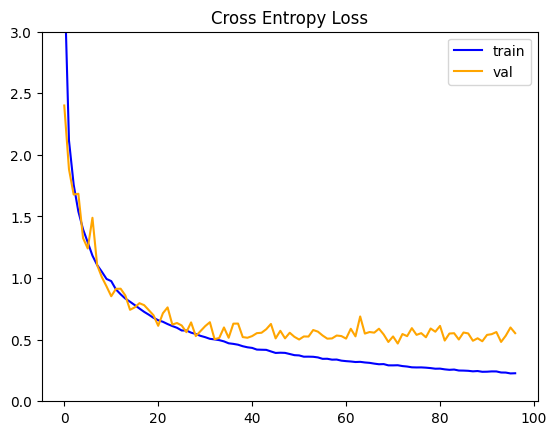

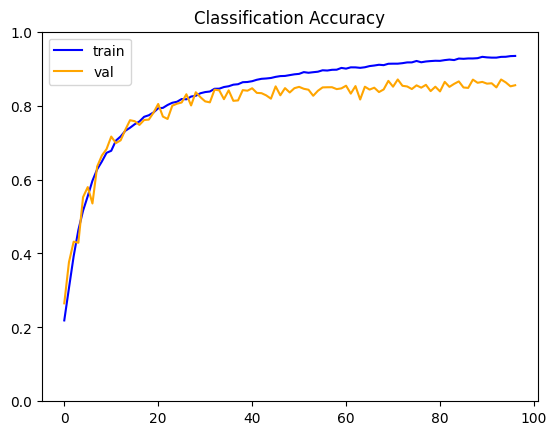

In [18]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.ylim(0, 3)
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.ylim(0, 1)
plt.legend()
plt.show()

El coste podemos ver que es estable y es en el epoch 15 que se fija en un valor. Además la accuracy baila alrededor de 0.85. Pensando que tenemos 10 clases  y que el 85% de las veces predice bien, para una sola clase esperariamos que aleatoriamente tuvieramos un 10% de accuracy en un modelo que clasifica al azar. En nuestro caso al ser del 85%, tenemos una mejora de 8.5 veces más! diria que tenemos bastante buena accuracy aqui.

Veamos que tipo de predicciones estoy obteniendo sobre el conjunto de test (vamos a pintar las imagenes y sus clasificaciones)

In [19]:
predictions = model.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [20]:
# vamos a usar una funcion que nos permita visualizar las predicciones de nuestro modelo

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(cifar10_labels[predicted_label],
                                100*np.max(predictions_array),
                                cifar10_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Dibujamos las primeras imagenes, con las predicciones y sus valores reales (un total de 20 imagenes)

Coloreamos las prediciones correctas en azul y los fallos en rojo.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


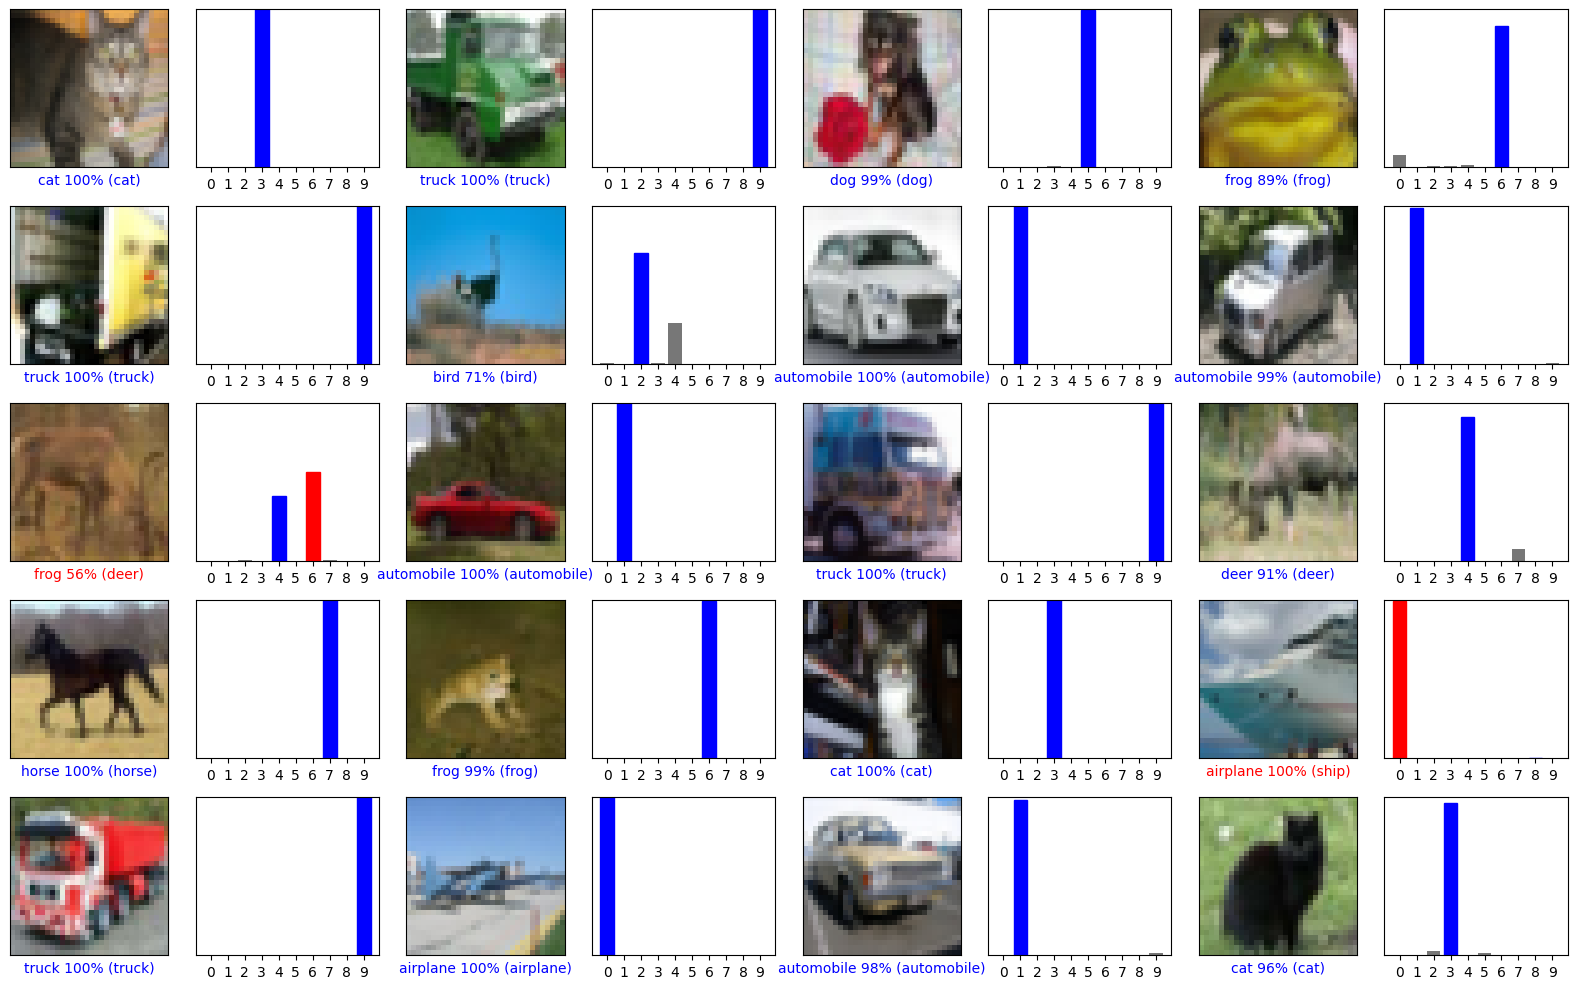

In [21]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+start, predictions[i+start], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## Guardamos el modelo para futuras evaluaciones

In [22]:
model.save('cifar10_base_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a id='seccion6'></a>
# **6. CONCLUSIONES**
<hr style="height:5px;border-width:0;color:red;background-color:red">

Conseguido una accuracy de 85,43 % con un modelo con poco overfitting. Dado que tenemos 10 clases a predecir, un 85% de accuracy es un resultado bastante esperanzador y bueno, ya que respecto a un modelo aleatorio de clasificacion (10% accuracy para las 10 clases), hemos mejorado 8,5 veces el accuracy.

El modelo es especialmente bueno clasificando algunas clases (camiones, gatos y coches por ejemplo) pero alguna vez tiene un fallo del que está totalmente seguro que es algo y luego es otra cosa (cierto overfiting)


Creo real y posible llegar a mejores resultados pero esto llevaría mucho mas tiempo y recursos de computación (quisiera guardar los créditos de GPU para otro proyecto de Deep Learning relacionado con el campo de las ciencias medicas).

La forma de optimizar seria ir probando cambios en la arquitectura como probar intercalar batch norm y dropout entre cada de las capas convolucionales, aumento complejidad de la red incluyendo mas bloques de convolución, aumento de filtros y variación de tamaño del kernel indistintamente.

De tener tiempo y recursos ilimitados pondría en practica estas ideas para llegar a mejores resultados, pero como la vida misma, hay que elegir sabiamente donde destinamos nuestro tiempo, dinero y atención.

